# UNSUPERVISED LEARNING - CLUSTER

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Step 3: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Step 4: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Step 5: Use the Elbow Method to Find Optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

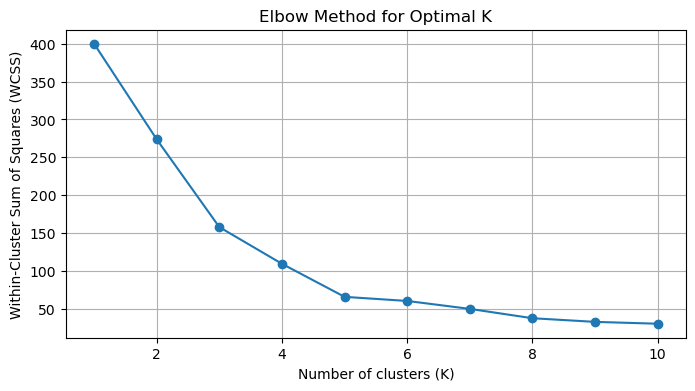

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


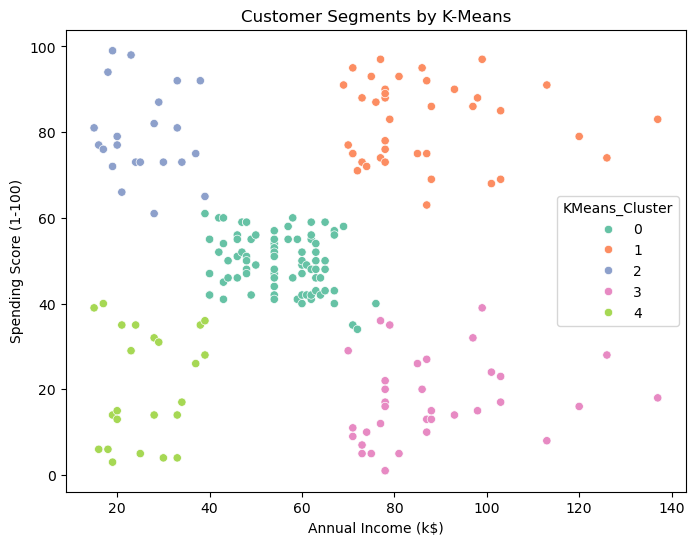

In [7]:
# Step 6: Apply KMeans with Chosen K (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', palette='Set2', data=df)
plt.title('Customer Segments by K-Means')
plt.show()

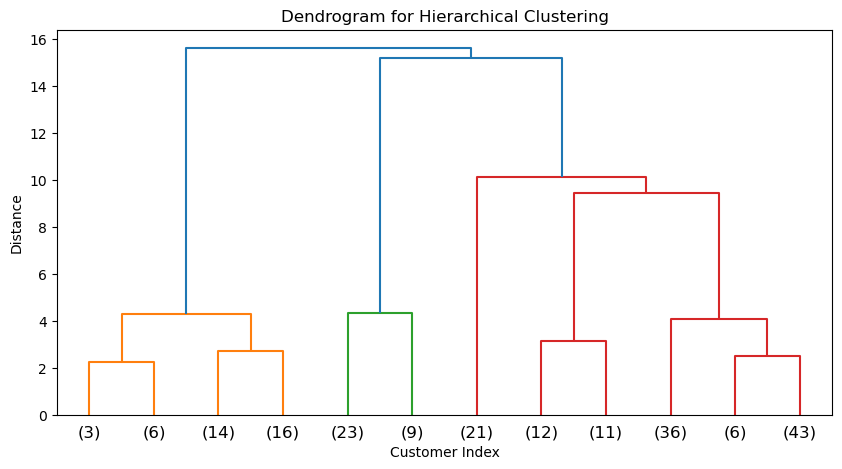

In [8]:
# Step 8: Hierarchical Clustering - Create Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

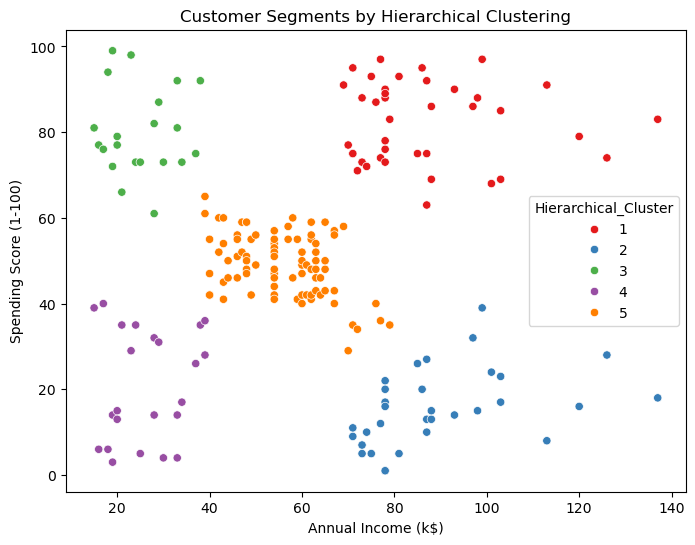

In [9]:
# Step 9: Form Flat Clusters from Dendrogram (e.g., 5 clusters)
df['Hierarchical_Cluster'] = fcluster(linked, t=5, criterion='maxclust')

# Step 10: Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Hierarchical_Cluster', palette='Set1', data=df)
plt.title('Customer Segments by Hierarchical Clustering')
plt.show()